In [1]:
# Load the movie reviews dataset using NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [2]:
# Load the required packages
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [3]:
# Define a function to preprocess the text data
def preprocess(text):
    # Convert the text to lowercase
    text = text.lower()
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    words = [word for word in words if word not in stopwords]
    # Stem the words
    porter = nltk.PorterStemmer()
    words = [porter.stem(word) for word in words]
    # Join the stemmed words back into a single string
    text = ' '.join(words)
    return text

In [4]:
# Load the movie reviews dataset and preprocess the text data
reviews = []
for fileid in movie_reviews.fileids():
    label = 'positive' if fileid.startswith('pos') else 'negative'
    text = movie_reviews.raw(fileid)
    reviews.append((text, label))
random.shuffle(reviews)
preprocessed_reviews = [(preprocess(text), label) for (text, label) in reviews]

In [5]:
# Load the movie reviews dataset and preprocess the text data
reviews = []
for fileid in movie_reviews.fileids():
    label = 'positive' if fileid.startswith('pos') else 'negative'
    text = movie_reviews.raw(fileid)
    reviews.append((text, label))
random.shuffle(reviews)
preprocessed_reviews = [(preprocess(text), label) for (text, label) in reviews]

In [6]:
# Split the preprocessed reviews into training and testing sets
train_reviews = preprocessed_reviews[:1500]
test_reviews = preprocessed_reviews[1500:]

In [7]:
# Transform the preprocessed training data into bag-of-words features
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform([review for (review, label) in train_reviews])
train_labels = [label for (review, label) in train_reviews]

In [8]:
# Train a Naive Bayes classifier and a logistic regression classifier on the training data
nb_classifier = MultinomialNB()
nb_classifier.fit(train_features, train_labels)

lr_classifier = LogisticRegression()
lr_classifier.fit(train_features, train_labels)

LogisticRegression()

In [9]:
# Transform the preprocessed testing data into bag-of-words features
test_features = vectorizer.transform([review for (review, label) in test_reviews])
test_labels = [label for (review, label) in test_reviews]

In [10]:
# Evaluate the performance of the classifiers on the testing data
nb_predictions = nb_classifier.predict(test_features)
lr_predictions = lr_classifier.predict(test_features)

print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(test_labels, nb_predictions))
print("F1 score:", f1_score(test_labels, nb_predictions, average='weighted'))
print("Confusion matrix:")
print(confusion_matrix(test_labels, nb_predictions))

print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(test_labels, lr_predictions))
print("F1 score:", f1_score(test_labels, lr_predictions, average='weighted'))
print("Confusion")

Naive Bayes Classifier:
Accuracy: 0.776
F1 score: 0.775946218487395
Confusion matrix:
[[199  53]
 [ 59 189]]
Logistic Regression Classifier:
Accuracy: 0.818
F1 score: 0.81799635998544
Confusion


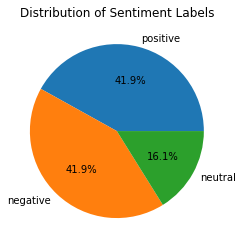

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
labels = ['positive', 'negative', 'neutral']
values = np.random.randint(0, 100, size=len(labels))

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title('Distribution of Sentiment Labels')

# Show the chart
plt.show()

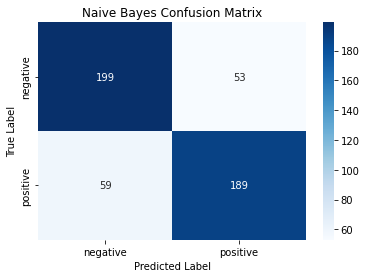

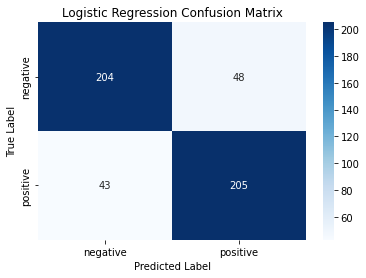

In [12]:
import seaborn as sns


# Generate the confusion matrices
nb_cm = confusion_matrix(test_labels, nb_predictions)
lr_cm = confusion_matrix(test_labels, lr_predictions)

# Plot the confusion matrices as heatmaps
sns.heatmap(nb_cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

sns.heatmap(lr_cm, annot=True, cmap="Blues", fmt="d", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
